# Plot metrics

This notebooks contains some util functions to plot loss curves and other metrics based on the log files.


In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd

Define all functions


In [5]:
def plot_metrics(
    df_train,
    df_valid=None,
    labels=["Training", "Validation"],
    logy=False,
    num_columns=2,
):
    df_train = df_train.astype(float)
    columns = set(df_train.columns)
    if df_valid is not None:
        df_valid = df_valid.astype(float)
        columns = columns.union(set(df_valid.columns))
    num_rows = int(len(columns) / num_columns) + (0 < len(columns) % num_columns)
    fig, axes = plt.subplots(
        num_rows, num_columns, figsize=(6 * num_columns, 4 * num_rows)
    )
    for i, column in enumerate(columns):
        ax = None
        if (2 <= num_columns) and (2 <= num_rows):
            ax = axes[int(i / num_columns), i % num_columns]
        elif (2 <= num_columns) or (2 <= num_rows):
            ax = axes[i]
        else:
            ax = axes

        ax.title.set_text(column)
        # ax.set_ylim(0, 1 + df_train[column].max())
        df_train[~df_train[column].isna()].plot.line(
            ax=ax,
            y=column,
            label=labels[0],
            logy=logy,
            # NOTE: index is x-axis as default
        )
        if df_valid is not None and column in df_valid.columns:
            df_valid[~df_valid[column].isna()].plot.line(
                ax=ax, y=column, linestyle="-.", label=labels[1], logy=logy
            )

    fig.tight_layout()


def plot_loss_txt(
    path,
    logy=False,
    columns=[
        "loss",
    ],
    num_columns=2,
):
    loss_file = open(path, "r")
    content = loss_file.read().replace("\n", "").replace("}{", "},{")
    entries = json.loads("[" + content + "]")
    print(f"Read {len(entries)} entries")
    df = pd.DataFrame.from_records(entries)
    df_train = df[df["set"] == "train"].groupby(["epoch"])[columns].mean()
    df_valid = df[df["set"] == "valid"].groupby(["epoch"])[columns].mean()

    plot_metrics(df_train, df_valid, logy=logy, num_columns=num_columns)

    for column in df_valid.columns:
        print(
            f"Lowest {column}: {df_valid[column].min()} in epoch {df_valid[column].idxmin()}"
        )

Read 7400 entries
Lowest loss: 2.0632492661476136 in epoch 49


Text(0.5, 1.0, 'Total loss of PDDD ResNet50 with PlantDoc dataset')

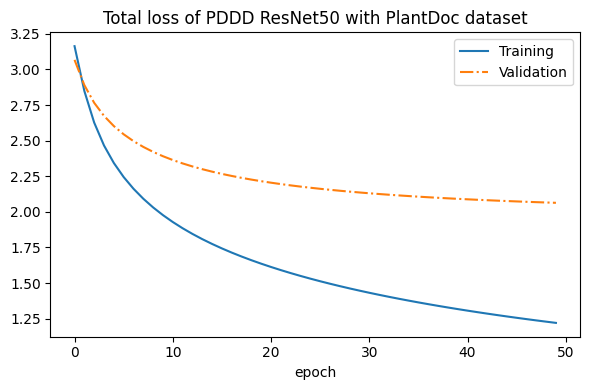

In [7]:
# Lowest
plot_loss_txt(
    "../runs/ResNet50_PlantDoc/loss.txt",
    columns=["loss"],
    num_columns=1,
)
plt.title("Total loss of PDDD ResNet50 with PlantDoc dataset")